# Homework 3: DataFrames, Control Flow, and Probability

## Due Tuesday, April 30th at 11:59PM

Welcome to Homework 3! This homework will cover lots of different topics:
- Grouping with subgroups (see [BPD 11](https://notes.dsc10.com/02-data_sets/groupby.html#subgroups))
- Merging DataFrames (see [BPD 13](https://notes.dsc10.com/02-data_sets/merging.html))
- Conditional statements (see [CIT 9.1](https://inferentialthinking.com/chapters/09/1/Conditional_Statements.html))
- Iteration (see [CIT 9.2](https://inferentialthinking.com/chapters/09/2/Iteration.html))
- Probability (see [CIT 9.5](https://inferentialthinking.com/chapters/09/5/Finding_Probabilities.html))

### Instructions

Remember to start early and submit often. You are given six slip days throughout the quarter to extend deadlines. See the syllabus for more details. With the exception of using slip days, late work will not be accepted unless you have made special arrangements with your instructor.

**Important**: For homeworks, the `otter` tests don't usually tell you that your answer is correct. More often, they help catch careless mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach). These are great questions for office hours (the schedule can be found [here](https://dsc10.com/calendar)) or Ed. Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. 

In [1]:
# Please don't change this cell, but do make sure to run it.
import babypandas as bpd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)

import numpy as np
import otter
grader = otter.Notebook()
answer_words = bpd.read_csv('data/wordle.csv').get('word').values

# We need to import some extra packages for some fun demonstrations.
import json
from ipywidgets import interact, widgets
from IPython.display import YouTubeVideo, HTML, display, clear_output, Image, IFrame

# Don't worry about this.
def read_json(path):
    f = open(path, 'r')
    return json.load(f)

### Supplemental Video on DataHub and Jupyter Notebooks

In Lab 0, we linked you to a video that walks you through key ideas you should be aware of when working on DataHub and in Jupyter Notebooks, including
- how files are organized on DataHub
- what it means to "restart the kernel"
- how to use keyboard shortcuts (most important: use `SHIFT + ENTER` to run a cell!)

We're linking it here again for your convenience. If you feel a little shaky on how to work your way around a notebook or troubleshoot issues, we recommend you give it another watch. (When troubleshooting, make sure to always check the [Debugging](https://dsc10.com/debugging/) tab on the course website as well.)

The video is quite long, but if you open the video directly on YouTube (which you can do by clicking the video's title after it loads in the next cell) you'll see timestamps in the description which you can use to jump to different parts of the video depending on what you'd like to learn more about.

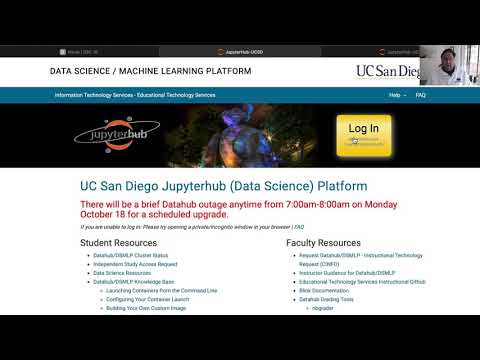

In [2]:
# Run this cell.
YouTubeVideo('Hq8VaNirDRQ')

## 0. Mid-Quarter Survey

We'd like to hear from you on how DSC 10 has been going so far this quarter. To do so, we've put together a survey that asks you to provide feedback on all aspects of the course. You can provide as much or as little detail as you'd like. We value your input and will use the results of the survey to improve the course!

This survey is entirely anonymous, though you are free to leave your name and email if you want. The responses to the survey will be visible to both course staff and the Data Science Student Representatives. There will also be a question at the end of the survey that will allow you to provide feedback on the DSC program as a whole.

<center><h3>Click <a href="https://forms.gle/JD1azLrAffvyhW7r9">here</a> to access the survey.</h3></center>

After completing the survey, enter the keyword provided at the end of the survey to get credit towards this homework assignment.

In [3]:
survey_keyword = "anthology"

In [4]:
grader.check("q0")

q0 results: All test cases passed!

## 1. 100 Years of "C" Baby Names 👶🏻

What letter does your first name start with? In this problem, we'll look at baby names starting with the letter "C". The file `data/baby_names.csv` contains information from the [Social Security Administration](https://www.ssa.gov/oact/babynames/limits.html) about "C" baby names in the US from 1923 to 2022 — that's nearly a century! Run the cell below to read in the data.

In [5]:
baby = bpd.read_csv('data/baby_names.csv')
baby

,State,Gender,Year,Name,Count
0,AK,M,1923,Charles,7
1,AL,F,1923,Catherine,189
2,AL,F,1923,Carrie,176
3,AL,F,1923,Christine,122
4,AL,F,1923,Carolyn,71
...,...,...,...,...,...
296486,WY,M,2022,Carson,10
296487,WY,M,2022,Carter,9
296488,WY,M,2022,Caleb,8
296489,WY,M,2022,Cameron,7


The DataFrame `baby` has a row for each `'State'` (50 US states plus Washington DC), `'Gender'` (`'M'` or `'F'`, as assigned at birth), `'Year'` (between 1923 and 2022), and `'Name'`. The `'Count'` column records the number of babies of that gender who were given that name in one state in one year.

The first row in `baby` contains the name `'Charles'`. Below, we look at only the rows corresponding to the name `'Charles'`.

In [6]:
baby[baby.get('Name') == 'Charles']

,State,Gender,Year,Name,Count
0,AK,M,1923,Charles,7
23,AL,M,1923,Charles,609
68,AR,M,1923,Charles,447
99,AZ,M,1923,Charles,51
138,CA,M,1923,Charles,700
...,...,...,...,...,...
296276,VT,M,2022,Charles,17
296326,WA,M,2022,Charles,109
296403,WI,M,2022,Charles,108
296459,WV,M,2022,Charles,40


The first row of the DataFrame shows that there were 7 male babies named Charles born in Alaska in 1923. There are many other rows corresponding to a `'Name'` Charles, which come from other years, other states, and also female babies named Charles, of which there are some!


Run the cell below to find out when and where many female Charles were born.

In [7]:
female_charles = baby[(baby.get('Name') == 'Charles') & (baby.get('Gender') == 'F')]
female_charles.sort_values(by='Count', ascending=False)

,State,Gender,Year,Name,Count
8118,TX,F,1927,Charles,38
223834,KY,F,2004,Charles,37
19651,TX,F,1934,Charles,31
17977,TX,F,1933,Charles,31
33675,TX,F,1942,Charles,28
...,...,...,...,...,...
36089,AR,F,1944,Charles,5
101463,NJ,F,1970,Charles,5
34874,MI,F,1943,Charles,5
101923,PA,F,1970,Charles,5


**Question 1.1.** There are many more male Charles than female Charles, so let's look at the popularity of the name Charles in male babies over time. Create a line plot that shows how the number of male babies named Charles has changed over time in the US. Then use your plot to answer the question that follows.

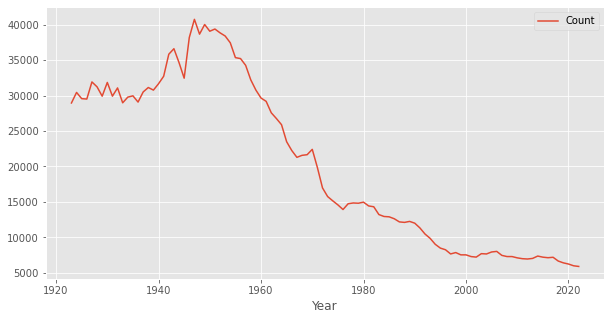

In [8]:
x = baby[(baby.get('Name') == 'Charles') & (baby.get('Gender') == 'M')].groupby('Year').sum()
x.plot(kind='line');

Around what year was the peak in popularity for the name 'Charles' in male babies? Choose the closest answer from the options below and set `male_charles_peak` to 1, 2, 3, or 4 corresponding to your answer choice.
1. 1930
2. 1950
3. 1960
4. 2000

In [9]:
male_charles_peak = 2

In [10]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 1.2.** In the `baby` DataFrame, how many babies of each gender were born in each state? Create a DataFrame named `num_babies` with one row for each gender in each state and columns `'State'`, `'Gender'`, and `'Count'`, which contains the total number of babies of each gender in each state with a "C" name. The first few rows of `num_babies` are shown below.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>State</th>
      <th>Gender</th>
      <th>Count</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>AK</td>
      <td>F</td>
      <td>13605</td>
    </tr>
    <tr>
      <th>1</th>
      <td>AK</td>
      <td>M</td>
      <td>20039</td>
    </tr>
    <tr>
      <th>2</th>
      <td>AL</td>
      <td>F</td>
      <td>154079</td>
    </tr>
    <tr>
      <th>3</th>
      <td>AL</td>
      <td>M</td>
      <td>234513</td>
    </tr>
  </tbody>
</table>

***Hints:***
- You can do this in one line of code.
- Don't forget to use `.reset_index()`.


In [11]:
num_babies = (baby[baby.get('Name').str.startswith('C')].get(['State', 'Gender', 'Count']).groupby(['State', 'Gender']).sum().reset_index())
num_babies

,State,Gender,Count
0,AK,F,13605
1,AK,M,20039
2,AL,F,154079
3,AL,M,234513
4,AR,F,84466
...,...,...,...
97,WI,M,192059
98,WV,F,81674
99,WV,M,119438
100,WY,F,12765


In [12]:
grader.check("q1_2")

q1_2 results: All test cases passed!

A gendered name is a combination of a name and a gender, such as female Charles. Let's explore the average age of people with each gendered name. For example, let's calculate the average age of all female Charles.

In [13]:
female_charles

,State,Gender,Year,Name,Count
298,GA,F,1923,Charles,5
409,IL,F,1923,Charles,8
527,KY,F,1923,Charles,6
575,LA,F,1923,Charles,7
618,MA,F,1923,Charles,5
...,...,...,...,...,...
174475,CA,F,1992,Charles,7
178529,CA,F,1993,Charles,9
182590,CA,F,1994,Charles,5
223834,KY,F,2004,Charles,37


We'll define the age of a person as 2024 (the current year) minus the year in which the person was born. This doesn't take into account people's birthdays, because we don't have that information. For example, if a female Charles was born in 1984, they will be counted as 2024 - 1984 = 40 years old. Therefore the **total age** of all the female Charles is given below.

In [14]:
total_age = ((2024 - female_charles.get('Year')) * female_charles.get('Count')).sum()
total_age

501582

To find the average age, we need to know how many female Charles there are. The **total count** of female Charles is given below.

In [15]:
total_count = female_charles.get('Count').sum()
total_count

6719

Therefore the **average age** of female Charles is given below.

In [16]:
average_age = total_age / total_count
average_age

74.65128739395743

Notice that we _cannot_ calculate the average age of female Charles as follows.

In [17]:
age = 2024 - female_charles.get('Year')
age.mean()

72.66909090909091

This is incorrect because it does not take into account the fact that there were more female Charles born some years than others. 

**Question 1.3.** Create a DataFrame named `avg_age` that has one row for each gendered name and columns `'Gender'`, `'Name'`, and `'Average_Age'`, which contains the average age of all people with each gendered name. The first few rows of `avg_age` are shown below.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Gender</th>
      <th>Name</th>
      <th>Average_Age</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>F</td>
      <td>Cache</td>
      <td>26.813333</td>
    </tr>
    <tr>
      <th>1</th>
      <td>M</td>
      <td>Cache</td>
      <td>13.398496</td>
    </tr>
    <tr>
      <th>2</th>
      <td>F</td>
      <td>Cade</td>
      <td>20.000000</td>
    </tr>
    <tr>
      <th>3</th>
      <td>M</td>
      <td>Cade</td>
      <td>16.929738</td>
    </tr>
  </tbody>
</table>

***Hints:***
- Before attempting this question, make sure you understand the strategy shown above for finding the average age of female Charles. You will need to generalize this approach.
- This is a multi-step problem. Add cells and display your intermediate results so you can see your progress as you go.
- You should check that the average age for female Charles in your DataFrame `avg_age` is the same as we found above.


In [18]:
sort = baby.sort_values(by = 'Name')
total = sort.assign(Total_age = ((2024 - sort.get('Year')) * sort.get('Count')))
grouped = total.groupby(['Gender', 'Name']).sum().drop(columns = 'Year')
average_age_col = grouped.get('Total_age')/grouped.get('Count')
average_age_col
avg_age = grouped.assign(Average_Age = average_age_col).reset_index().sort_values(by = 'Name').reset_index().get(['Gender', 'Name', 'Average_Age'])
avg_age

,Gender,Name,Average_Age
0,F,Cache,26.813333
1,M,Cache,13.398496
2,F,Cade,20.000000
3,M,Cade,16.929738
4,F,Caden,18.282178
...,...,...,...
461,F,Cyan,21.492647
462,M,Cynthia,50.826307
463,F,Cynthia,60.381688
464,F,Cypress,8.113861


In [19]:
grader.check("q1_3")

q1_3 results: All test cases passed!

## 2. Cerealsly?!🥣

In this question, we'll be exploring some data on the most popular cereal in each state, from [this article](https://www.zippia.com/advice/each-states-favorite-cereal/).

In [20]:
states = bpd.read_csv('data/states.csv')
states

,State,Favorite Cereal
0,Delaware,Cap’n Crunch
1,Illinois,Cinnamon Toast Crunch
2,Kentucky,Cookie Crisp
3,Arkansas,Froot Loops
4,North Carolina,Cinnamon Toast Crunch
...,...,...
46,Mississippi,Frosted Flakes
47,New York,Frosted Flakes
48,Minnesota,Cinnamon Toast Crunch
49,Texas,Froot Loops


In the `states` DataFrame above, each state's `'Favorite Cereal'` is defined as the cereal, among the top 20 varieties, that has been Google searched a disproportionately high amount in that state. 

The `states` DataFrame does not contain any information about the cereals themselves. We'll also use a [dataset from Kaggle](https://www.kaggle.com/datasets/crawford/80-cereals?resource=download) with nutritional information on many varieties of cereal. Run the cell below to load in this data and store it in a DataFrame called `varieties`.

In [21]:
varieties = bpd.read_csv('data/cereal.csv')
varieties

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


**Question 2.1.** Using the `merge` method, combine the `states` and `varieties` DataFrames, and assign the resulting DataFrame to the variable `states_and_varieties`. 
- `states_and_varieties` should contain all of the columns in both `states` and `varieties`, minus the `'name'` column from `varieties`, which is redundant with the `'Favorite Cereal'` column from `states`.
- Sort `states_and_varieties` by `'State'` in ascending order.
- Reset the index of `states_and_varieties` so that it is `0`, `1`, `2`, and so on. Make sure the old index isn't also included as a column.

In [22]:
states_and_varieties = states.merge(varieties, left_on='Favorite Cereal', right_on='name')
states_and_varieties = states_and_varieties.sort_values(by='State').reset_index(drop=True)
states_and_varieties = states_and_varieties.drop(columns=['name'])
states_and_varieties

,State,Favorite Cereal,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,Alabama,Frosted Flakes,K,C,110,1,0,200,1.0,14.0,11,25,25,1,1.0,0.75,31.435973
1,Alaska,Cap’n Crunch,Q,C,120,1,2,220,0.0,12.0,12,35,25,2,1.0,0.75,18.042851
2,Arizona,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.0,1.00,33.174094
3,Arkansas,Froot Loops,K,C,110,2,1,125,1.0,11.0,13,30,25,2,1.0,1.00,32.207582
4,Colorado,Froot Loops,K,C,110,2,1,125,1.0,11.0,13,30,25,2,1.0,1.00,32.207582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,Washington,Froot Loops,K,C,110,2,1,125,1.0,11.0,13,30,25,2,1.0,1.00,32.207582
39,Washington DC,Fruity Pebbles,P,C,110,1,1,135,0.0,13.0,12,25,25,2,1.0,0.75,28.025765
40,West Virginia,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193
41,Wisconsin,Kix,G,C,110,2,1,260,0.0,21.0,3,40,25,2,1.0,1.50,39.241114


In [23]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Question 2.2.** If you completed Question 2.1 correctly, you'll notice that `states_and_varieties` has fewer rows than both `states` and `varieties`. This is because there are some cereals that are in `states` and not in `varieties`, and other cereals that are in `varieties` and not in `states`. 

Below, assign `states_not_varieties` to the number of different cereals that are in `states` and not in `varieties`. Similarly, assign `varieties_not_states` to the number of different cereals that are in `varieties` and not in `states`.

***Hint:*** There are two ways to find the number of unique values in a column.

1. Group by that column. On the resulting DataFrame, use `.shape[0]`.

2. Use the `.unique()` method on the Series corresponding to that column. Use `len` on the resulting array.

You'll need to do this three times – once each for the columns that contain cereal names in `states`, `varieties`, and `states_and_varieties`.

<!--
BEGIN QUESTION
name: q2_2
-->

In [24]:
states_unique_names = states.get('Favorite Cereal').unique()
varieties_unique_names = varieties.get('name').unique()
states_varieties_unique_names = states_and_varieties.get('Favorite Cereal').unique()
states_not_varieties = len(states_unique_names) - len(set(states_varieties_unique_names))
varieties_not_states = len(varieties_unique_names) - len(set(states_varieties_unique_names))

print('There are', states_not_varieties, 'cereals in `states` that are not in `varieties`.')
print('There are', varieties_not_states, 'cereals in `varieties` that are not in `states`.')

There are 2 cereals in `states` that are not in `varieties`.
There are 63 cereals in `varieties` that are not in `states`.


In [25]:
grader.check("q2_2")

q2_2 results: All test cases passed!

Now that we better understand how `states_and_varieties` came to be, let's use it to learn more about states' cereal preferences.

In [26]:
states_and_varieties

,State,Favorite Cereal,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,Alabama,Frosted Flakes,K,C,110,1,0,200,1.0,14.0,11,25,25,1,1.0,0.75,31.435973
1,Alaska,Cap’n Crunch,Q,C,120,1,2,220,0.0,12.0,12,35,25,2,1.0,0.75,18.042851
2,Arizona,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.0,1.00,33.174094
3,Arkansas,Froot Loops,K,C,110,2,1,125,1.0,11.0,13,30,25,2,1.0,1.00,32.207582
4,Colorado,Froot Loops,K,C,110,2,1,125,1.0,11.0,13,30,25,2,1.0,1.00,32.207582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,Washington,Froot Loops,K,C,110,2,1,125,1.0,11.0,13,30,25,2,1.0,1.00,32.207582
39,Washington DC,Fruity Pebbles,P,C,110,1,1,135,0.0,13.0,12,25,25,2,1.0,0.75,28.025765
40,West Virginia,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193
41,Wisconsin,Kix,G,C,110,2,1,260,0.0,21.0,3,40,25,2,1.0,1.50,39.241114


**Question 2.3.** Since there can be many ways to define a state's favorite cereal, there are other datasets about each state's favorite cereal with different data. One such [article from AOL](https://www.aol.com/most-popular-cereal-every-state-181423663.html) bases its data on Google searches among all cereal brands. Run the next cell to load in the data from that article.

In [27]:
states_alt = bpd.read_csv('data/states2.csv')
states_alt

,State,Favorite Cereal
0,Colorado,Life
1,New York,Oreo O's
2,Connecticut,Life
3,Nebraska,Life
4,Oregon,Life
...,...,...
46,Utah,Life
47,Louisiana,King Vitamin
48,Vermont,Kix
49,Mississippi,Special K


Now that we have two DataFrames of favorite cereals per state, `states` and `states_alt`, we can figure out the number of states in which both DataFrames agree on the favorite cereal. Save this number of states in the variable `same_cereal`.

In [28]:
merged_states = states.merge(states_alt, on='State')
same_cereal_states = merged_states[merged_states.get('Favorite Cereal_x') == merged_states.get('Favorite Cereal_y')]
same_cereal = same_cereal_states.shape[0]

same_cereal

0

In [29]:
grader.check("q2_3")

q2_3 results: All test cases passed!

As you can see, a state's "favorite cereal" is definitely open to interpretation!

## 3. Tritonmobile 🚗 🚙

UCSD is launching its own car dealership called Tritonmobile! Every UCSD student that buys a Tritonmobile will have 5 years to pay off a car loan, plus they'll get a special Triton discount. You and Charlie have been hired as data scientists for the project. Your job is to make a monthly car-payment calculator for the Tritonmobile website. 

Car payments depend on a few factors, including the price of the car, the amount paid up-front (called the down payment), the interest rate, and the length of the loan (in this case, 5 years). 

Tritonmobile will use a student's credit score to determine their interest rate. Interest is essentially the cost of borrowing money - it is money paid on top of borrowed money. Interest rates are mainly decided based on a person's credit score, which is a way of measuring financial trustworthiness. To learn more about this, check out [this article](https://www.equifax.com/personal/education/personal-finance/articles/-/learn/what-do-interest-rates-mean/) about what interest rates mean and [this article](https://www.experian.com/blogs/ask-experian/why-do-people-with-higher-credit-scores-get-lower-interest-rates/#:~:text=People%20with%20higher%20credit%20scores,always%20looking%20to%20minimize%20risk.) about why credit scores affect interest rates.

Let's walk through how Tritonmobile will calculate the loan payment on a \\$20,000 car with a $5,000 down payment, when the vehicle is sold to a student with a credit score of 750. The steps are as follows.

1. **Calculate the interest rate of the loan based on the credit score**.  Tritonmobile determines the interest rate according to the table below.

| Credit Rating |  Credit Score |Interest Rate |
| --- | --- | --- |
| super prime | 781 and above | 5.6% |
| prime | 661 to 780 | 6.9% |
| near prime | 601 to 660 |  9.3% |
| subprime | 501 to 600 |  11.9% |
| deep subprime | up to 500 | 14.2% |

For our example, if the car buyer has a 750 credit score, their interest rate is 6.9\%. 

2. **Calculate the principal amount on the loan using the down payment**. The principal amount is how much money you have to pay off (through monthly installments) after giving a down payment. This is usually calculated by simply subtracting the down payment from the cost of the car. However, Tritonmobile is offering a special discount for UCSD students called the Triton discount that lowers the principal even further. The higher the down payment, then the higher the discount. The Triton discount is determined by the table below.

| Down Payment as Percentage of Cost | Triton Discount |
| --- | --- |
| [0%, 10%) | 2% |
| [10%, 20%) | 5% |
| [20%, 30%) | 9% |
| [30%, 40%) | 14% |
| 40% or above | 20% |

Note that the notation $[a, b)$ means "greater than or equal to $a$ and less than $b$". For example, a down payment that is equal to 10% of the total payment earns the buyer a 2% Triton discount, but 10.1% earns a 5% discount.

For our example, a down payment of \\$5,000 on a \\$20,000 car means the down payment already covers 25% of the cost of the car. According to the table above, with 25% of the cost of the car already covered by the down payment, the Triton discount is 9%. This discount is applied to the remaining balance of the car after the down payment, which is \$15,000. So the buyer gets an additional discount of \\$1,350, which comes from 9\% of \\$15,000. This means that instead of having to pay off \\$15,000 through monthly installments, they only need to pay off \\$13,650 (which is \\$1,350 less than \\$15,000).

3. **Calculate the monthly payment based on the interest rate and principal.** The formula below details how to calculate the monthly payment. This is called the *annuity* formula and it's widely used to determine monthly loan payments, a process known as [*amortization*](https://en.wikipedia.org/wiki/Amortization_calculator). 
    
$$ \text{monthly car payment} = \text{principal} \cdot\frac{\frac{\text{interest}}{12}}{1-\left(1+ \frac{\text{interest}}{12}\right)^{-\text{number of months}}}$$

For this example, we previously calculated the interest rate to be 6.9\% (or 0.069 as a proportion) and the principal to be \\$13,650. A five year loan is 60 months. Plugging these values into the formula yields $270, which is the monthly payment.

Now that you know how monthly loan payments are calculated, let's build our loan payment calculator!

**Question 3.1.** Complete the implementation of the function `calculate_interest`, which takes in a credit score (`score`) and returns the corresponding interest rate as a **proportion**. For instance, `calculate_interest(750)` should evaluate to `.069` and `calculate_interest(781)` should evaluate to `.056`.

For you convenience, the interest table is shown again below.

| Credit Rating |  Credit Score |Interest Rate |
| --- | --- | --- |
| super prime | 781 and above | 5.6% |
| prime | 661 to 780 | 6.9% |
| near prime | 601 to 660 |  9.3% |
| subprime | 501 to 600 |  11.9% |
| deep subprime | up to 500 | 14.2% |

***Hint:*** Use `elif`.

In [30]:
def calculate_interest(score):  
    if score >= 781:
        return 0.056
    elif score >= 661:
        return 0.069
    elif score >= 601:
        return 0.093
    elif score >= 501:
        return 0.119
    else:
        return 0.142

# Feel free to change the line below to try other examples.
calculate_interest(750) # should be 0.069

0.069

In [31]:
grader.check("q3_1")

q3_1 results: All test cases passed!

**Question 3.2.** Next, you need to calculate the Triton discount and the resulting principal for the loan. Complete the implementation of the function `calculate_principal`, which takes in the price of a car (`price`) and a down payment (`down_payment`) and returns the **principal after the Triton discount**. For instance, `calculate_principal(20_000, 5_000)` should evaluate to `13650.0` as calculated in the example above. For your convenience, the Triton discount table is shown again below.

| Down Payment as Percentage of Cost | Triton Discount |
| --- | --- |
| [0%, 10%) | 2% |
| [10%, 20%) | 5% |
| [20%, 30%) | 9% |
| [30%, 40%) | 14% |
| 40% or above | 20% |

***Hint:*** There are 3 steps to this process:
1. Calculate the percentage of the total payment that is covered by the down payment (e.g. a \\$5,000 down payment covers 25\% of a \\$20,000 car).
2. Use the table above to determine the Triton discount (e.g. if 25\% of the price is covered by the down payment, the Triton discount is 9\%).
3. Calculate the principal after the discount. Remember that the discount is applied to the price of the car less the down payment amount (e.g. with a 9\% discount, the balance of \\$5,000 yields a principal of \\$13650).

In [32]:
def calculate_principal(price, down_payment):
    down_payment_percentage = (down_payment / price) * 100
    
    if down_payment_percentage < 10:
        discount_percentage = 2
    elif down_payment_percentage < 20:
        discount_percentage = 5
    elif down_payment_percentage < 30:
        discount_percentage = 9
    elif down_payment_percentage < 40:
        discount_percentage = 14
    else:
        discount_percentage = 20

    discounted_price = price - down_payment
    discounted_price = discounted_price * (1 - (discount_percentage / 100))
    principal = discounted_price
    
    return principal

calculate_principal(20_000, 5_000) # should be 13650.0

13650.0

In [33]:
grader.check("q3_2")

q3_2 results: All test cases passed!

**Question 3.3.** Finally, complete the implementation of the function `monthly_payment`, which takes in the price of a car (`price`), a down payment (`down_payment`), and a credit score (`score`), and returns the monthly payment amount, **rounded to the nearest integer**. For example, a \\$20,000 car with a \\$5,000 down payment and a 750 credit score should produce a monthly payment of \\$270. For your convenience, the monthly payment formula is shown here again.

$$ \text{monthly car payment} = \text{principal} \cdot\frac{\frac{\text{interest}}{12}}{1-\left(1+ \frac{\text{interest}}{12}\right)^{-\text{number of months}}}$$


***Notes:***
- In this formula, the denominator is raised to the *negative* power of the number of months on the loan.
- All Tritonmobile loans are all paid over 5 years, or 60 months.
- You should use both of the functions you implemented in 3.1 and 3.2.

In [34]:
def monthly_payment(price, down_payment, score):
    principal = calculate_principal(price, down_payment)
    interest = calculate_interest(score)
    
    monthly_payment = principal * (interest / 12) / (1 - (1 + (interest / 12)) ** -60)
    
    return round(monthly_payment)
monthly_payment(20_000, 5_000, 750)

270

In [35]:
grader.check("q3_3")

q3_3 results: All test cases passed!

### Final Product

You just did all of the math necessary to build a car payment calculator, like the ones you see on many dealership websites. Charlie used your functions to create this interactive widget for the Tritonmobile website. Run the following cell once you've completed the rest of this question!

In [36]:
# Don't worry about the code, just play with the slider that appears after running.
def plot_car_payment_calculator(price, down_pay, credit_score):
    s = f'''
    <h1>Tritonmobile Car Payment Calculator 🚘 </h1>
    <h4>{'${:,.2f}'.format(price)}</h4>
    Total Car Price
    <h4>{'${:,.2f}'.format(down_pay)}</h4>
    Down Payment
    <h4>{'{:,.0f}'.format(credit_score)}</h4>
    Credit Score
    
    <h1>{'${:,.0f}'.format(monthly_payment(price, down_pay, credit_score))}</h2>
    Your Monthly Payment
    
    '''
    display(HTML(s))
    
interact(plot_car_payment_calculator, price=(10_000, 50_000, 1000), down_pay=(0, 10_000, 100), credit_score=(300, 850, 1));



interactive(children=(IntSlider(value=30000, description='price', max=50000, min=10000, step=1000), IntSlider(…

## 4. Wordle 🟨 ⬛ 🟨 🟩 ⬛


<img src = "data/wordle_example.jpg" width=200>

[Wordle](https://www.nytimes.com/games/wordle/index.html) is a word-guessing game that became extremely popular at the end of 2021. Players have six tries to guess a five-letter word. To play, you first enter a guess for the five-letter word. After you make your guess, each letter of your guess will be highlighted with a color-coded square as follows:

- A black square ⬛ means that this letter is **not** in the word at all.  
- A yellow square 🟨 means that this letter is in the word, but in a **different position**.  
- A green square means 🟩 the letter is in the **correct position**.

In this question, you will replicate some of that behavior using `for`-loops. We'll make a simplifying assumption that's not present in the real Wordle game: the answer word will always have five **different** letters and every guess must also have five **different** letters.

We'll represent Wordle results as a string of five colored square emojis. Emojis can be included in strings, just like letters, numbers, and punctuation! 

For example, if the answer word is `'STEIN'` and your guess is `'SCALE'`, as shown in the image above, your results can be represented by the string `'🟩⬛⬛⬛🟨'`. 

The array `emojis` defined below contains all the symbols we'll need to construct such strings.

In [37]:
emojis = np.array(['⬛', '🟨', '🟩'])
emojis

array(['⬛', '🟨', '🟩'], dtype='<U1')

Recall, in [Lecture 10](https://dsc10.com/resources/lectures/lec10/lec10.html), we introduced the accumulator pattern. In the coin-flipping example, we started with an empty array, and added to it in each iteration of our `for`-loop.

We can also use the accumulator pattern for strings, by starting with an empty string, and repeatedly adding onto it via concatenation. Here's an example that loops through the letters in a word and replaces certain letters with colored square emojis.

In [38]:
output = ''
for ch in 'goodbye':
    if ch == 'b':
        output = output + emojis[0] # add a black square
    elif ch == 'y':
        output = output + emojis[1] # add a yellow square
    elif ch == 'g':
        output = output + emojis[2] # add a green square
        
    else:
        output = output + ch
output

'🟩ood⬛🟨e'

In the above example, we started with an empty string, `output`. For each character of the string `'goodbye'`, we added a single new character to `output`, depending on whether we saw `'g'`, `'b'`, `'y'`, or something else.

**Question 4.1.** Now, complete the implementation of the function `emojify`, which takes as input two five-letter strings, each having no repeated letters. The first input string, `guess`, should be cross-checked with each letter of the second input string, `answer`. The function should return a new string, formed entirely of emojis from  the `emojis` array, that indicates the accuracy of each letter in the guess, as described in the rules above. For example, let's say the `answer` string is `'shark'`. Here is how the function would work on various example guesses.

```py
>>> emojify('crept', 'shark')
'⬛🟨⬛⬛⬛'

>>> emojify('chalk', 'shark')
'⬛🟩🟩⬛🟩'

>>> emojify('harks', 'shark')
'🟨🟨🟨🟨🟨'

>>> emojify('sharp', 'shark')
'🟩🟩🟩🟩⬛'

>>> emojify('shark', 'shark')
'🟩🟩🟩🟩🟩'
```

***Note:*** As we did in the preceding example, use the array `emojis` to access the emojis – don't actually include any colored square emojis in the code you write below.

***Hints:***
- Look at the slide titled *Ranges* in [Lecture 10](https://dsc10.com/resources/lectures/lec10/lec10.html#Ranges) for guidance.
- You'll need to use the `in` keyword, which we also introduced in Lecture 10.
- Remember to write a general function that works for any answer word, not just `'shark'`.

In [39]:
def emojify(guess, answer):
    # This line ensures your code works correctly regardless of 
    # whether the message is in upper case or lower case.
    guess = guess.lower()

    # Empty string to add on to.
    emoji_output_string = '' 
    
    # You'll need to complete the body of this for loop.
    for i in range(len(guess)):
        if guess[i] == answer[i]:
            emoji_output_string = emoji_output_string + emojis[2] #green
        elif guess[i] in answer:
            emoji_output_string = emoji_output_string + emojis[1] #yellow
        else:
            emoji_output_string = emoji_output_string + emojis[0] #black
    
    # Don't change this
    return emoji_output_string

# An example call to emojify. Try out some other words, too.
emojify('crept', 'shark')

'⬛🟨⬛⬛⬛'

In [40]:
grader.check("q4_1")

q4_1 results: All test cases passed!

### Final Product

You just implemented the logic for a Wordle game. Let's try it out! Run the following cell once you've completed the rest of this question, and you'll see a text box. Type a five-letter word with no repeated letters to guess the secret answer word. You can change your guess by backspacing and typing in a different guess for the same answer word. 

You can play the game more than once by running the cell again to generate a new answer word.

In [41]:

answer = np.random.choice(answer_words)
def emojify_live(guess):
    result = emojify(guess, answer)
    display(HTML('<h3>' + result + '</h3>'))
    if result == '🟩🟩🟩🟩🟩':
        display(HTML('<h3> You win! </h3>'))
display(HTML('<h2> Let\'s play Wordle! </h2>'))
interact(emojify_live, guess="");

interactive(children=(Text(value='', description='guess'), Output()), _dom_classes=('widget-interact',))

## 5. Triton Spirit Night Lotto 🔱 🏀 

<img src = "data/spirit_night.jpg" width=700>

Suppose UCSD holds a lottery in celebration of the men's basketball team's [exciting win at Spirit Night](https://ucsdtritons.com/news/2024/1/25/mens-basketball-tritons-hang-on-for-spirit-night-win.aspx). In this lottery, students can enter to win Triton Cash, or even free housing! Here's how the Spirit Night Lotto works:

- First, you pick five **different** numbers, one at a time, from 1 to 66, representing the winning score at the Spirit Night game.
- Then, you separately pick a number from 1 to 15. This is because the top scoring athlete (Bryce Pope) scored 15 points during the game. Let's say you select 9.
- The six numbers you have selected, or  **your numbers**, can be represented all together as (7, 32, 24, 65, 13, 9). This is a _sequence_ of six numbers – **order matters**!

The **winning numbers** are chosen by King Triton, who draws five balls, one at a time, **without replacement**, from a pot of white balls numbered 1 to 66. Then, he draws a gold ball, the Tritonball, from a pot of gold balls numbered 1 to 15. Both pots are completely separate, hence the different ball colors. For example, maybe the winning numbers are (65, 9, 24, 23, 1, 9).

We’ll assume for this problem that in order to win the grand prize (free housing), all six of your numbers need to match the winning numbers and be in the **exact same positions**. In other words, your entire sequence of numbers must be exactly the same as King Triton's sequence of winning numbers. However, if some numbers in your sequence match up with the corresponding number in the winning sequence, you will still win some Triton Cash. 

Suppose again that you select (7, 32, 24, 65, 13, 9) and the winning numbers are (65, 9, 24, 23, 1, 9). In this case, two of your numbers are considered to match two of the winning numbers. 
- Your numbers: (7, 32, **24**, 65, 13, **9**)
- Winning numbers: (65, 9, **24**, 23, 1, **9**)

You won't win free housing, but you will win some Triton Cash. Note that although both sequences include the number 65 within the first five numbers (representing a white ball), since they are in different positions, that's not considered a match.


**Question 5.1.** What is the probability that your Tritonball number (the last number in your sequence) matches the winning Tritonball number? Calculate your answer and assign it to `tritonball_chance`. If you need to do any calculations (e.g. multiplication or division), make Python do it; don't use a separate calculator. Your result should be a decimal number between 0 and 1.

In [42]:
tritonball_chance = 1/15
tritonball_chance

0.06666666666666667

In [43]:
grader.check("q5_1")

q5_1 results: All test cases passed!

**Question 5.2.** What is the probability that your first two numbers match King Triton's first two winning numbers **and** your Tritonball number matches the winning Tritonball number? Calculate your answer and assign it to `first_two_and_tritonball_chance`. If you need to do any calculations (e.g. multiplication or division), make Python do it; don't use a separate calculator. Your result should be a decimal number between 0 and 1.

***Hint:*** You need **all three** of the numbers to match. What probability rule should you use?

In [44]:
first_two_and_tritonball_chance = (1 / 66) * (1 / 65) * (1 / 15)
first_two_and_tritonball_chance

1.554001554001554e-05

In [45]:
grader.check("q5_2")

q5_2 results: All test cases passed!

**Question 5.3.** What is the probability that you win the grand prize, free housing? Calculate your answer and assign it to `free_housing_chance`. If you need to do any calculations (e.g. multiplication or division), make Python do it; don't use a separate calculator. Your result should be a decimal number between 0 and 1.

***Hint:*** When you select a ball without replacement, what happens to the total number of balls you can select next time?

In [46]:
free_housing_chance = (1 / 66) * (1 / 65) * (1 / 64) * (1 / 63) * (1 / 62) * (1 / 15)
free_housing_chance

6.216404065866433e-11

In [47]:
grader.check("q5_3")

q5_3 results: All test cases passed!

**Question 5.4.** What is the probability that you do **not** win free housing? Calculate your answer and assign it to `no_free_housing_chance`. If you need to do any calculations (e.g. multiplication or division), make Python do it; don't use a separate calculator. Your result should be a decimal number between 0 and 1.

In [48]:
no_free_housing_chance = 1 - free_housing_chance
no_free_housing_chance

0.999999999937836

In [49]:
grader.check("q5_4")

q5_4 results: All test cases passed!

## Finish Line: Almost there, but make sure to follow the steps below to submit! 🏁

**_Citations:_** Did you use any generative artificial intelligence tools to assist you on this assignment? If so, please state, for each tool you used, the name of the tool (ex. ChatGPT) and the problem(s) in this assignment where you used the tool for help.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

Please cite tools here.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

To submit your assignment:

1. Select `Kernel -> Restart & Run All` to ensure that you have executed all cells, including the test cells.
1. Read through the notebook to make sure everything is fine and all tests passed.
1. Run the cell below to run all tests, and make sure that they all pass.
1. Download your notebook using `File -> Download as -> Notebook (.ipynb)`, then upload your notebook to Gradescope.
1. Stick around while the Gradescope autograder grades your work. Make sure you see that all tests have passed on Gradescope.
1. Check that you have a confirmation email from Gradescope and save it as proof of your submission.

In [50]:
grader.check_all()

q0 results: All test cases passed!

q1_1 results: All test cases passed!

q1_2 results: All test cases passed!

q1_3 results: All test cases passed!

q2_1 results: All test cases passed!

q2_2 results: All test cases passed!

q2_3 results: All test cases passed!

q3_1 results: All test cases passed!

q3_2 results: All test cases passed!

q3_3 results: All test cases passed!

q4_1 results: All test cases passed!

q5_1 results: All test cases passed!

q5_2 results: All test cases passed!

q5_3 results: All test cases passed!

q5_4 results: All test cases passed!